# <font color = 'orange'>Callback Functions  
      
    
A callback is a powerful tool to customize the behavior of a Keras **model during training, evaluation, or inference**.  
**TensorBoard to visualize training** progress and results with TensorBoard, or tf.keras.callbacks. **ModelCheckpoint to periodically save your model during training**.  
This callback reduces the learning rate when a metric you've mentioned during training eg. accuracy or loss has stopped improving. Models often benefit from **reducing the learning time**.  
There are many callback functions,

1. Early Stopping callback
2. Model checkpointing callback
3. Tensorboard callback Functions

---

### <font color = 'blue'> Importing libraries

In [59]:
import tensorflow as tf

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

---

### <font color = 'blue'> Creating simpe classifier for MNIST dataset.

In [2]:
mnist = tf.keras.datasets.mnist

mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\darsh\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [6]:
len(x_train_full), len(x_test)

(60000, 10000)

### <font color = '#AA00FF'> Observation :
* There are total 60k images for training and 10k for testing.

In [14]:
# max value present training data
x_train_full.max()

255

---

### <font color = 'blue'> Splitting training data into train set and validation set
* Only scaling of input images.

In [13]:
# scaling the input images in range 0 to 1 for fast model training
# only no scaling of out image if scaled it will give only 0 as output
# In 60k images, 5k image for validation and reamining 55k for training
x_valid, x_train = x_train_full[:5000] / float(x_train_full.max()), x_train_full[5000:] / float(x_train_full.max())
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scaling the test data
x_test = x_test / 255.

---

### <font color = 'blue'> Visualize the data

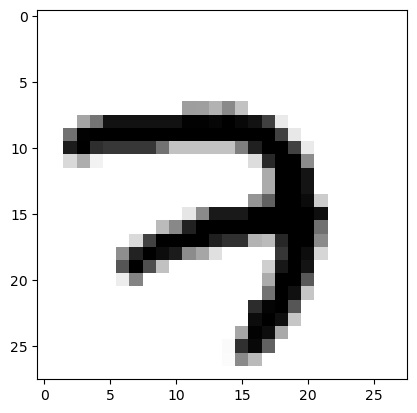

In [25]:
plt.imshow(x_train[0], cmap = 'binary')

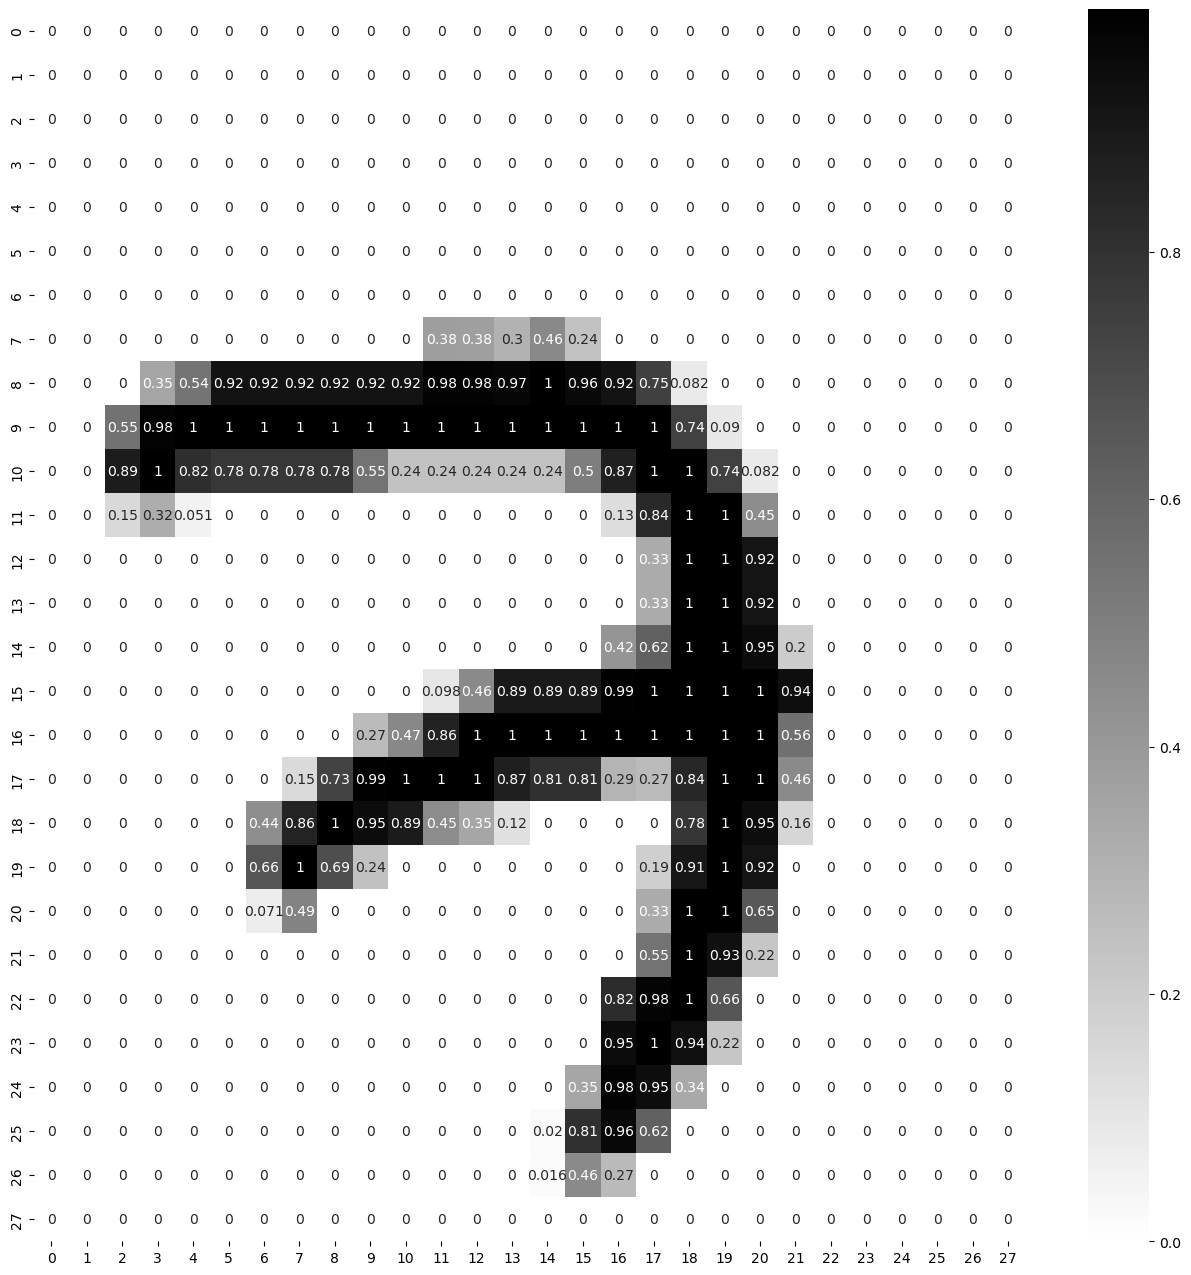

In [23]:
plt.figure(figsize = (16, 16))
sns.heatmap(x_train[0],annot = True, cmap = 'binary')
plt.show()

### <font color = '#AA00FF'> Observation :
* Image is 28 x 28 matrix.
* So, while giving input to neural network we have to flatten the image which is in 2d array to 1d array.
* Output is 10 Neuron as we have output 0 to 9 number as output.

---

## Let's Create the Neural Network

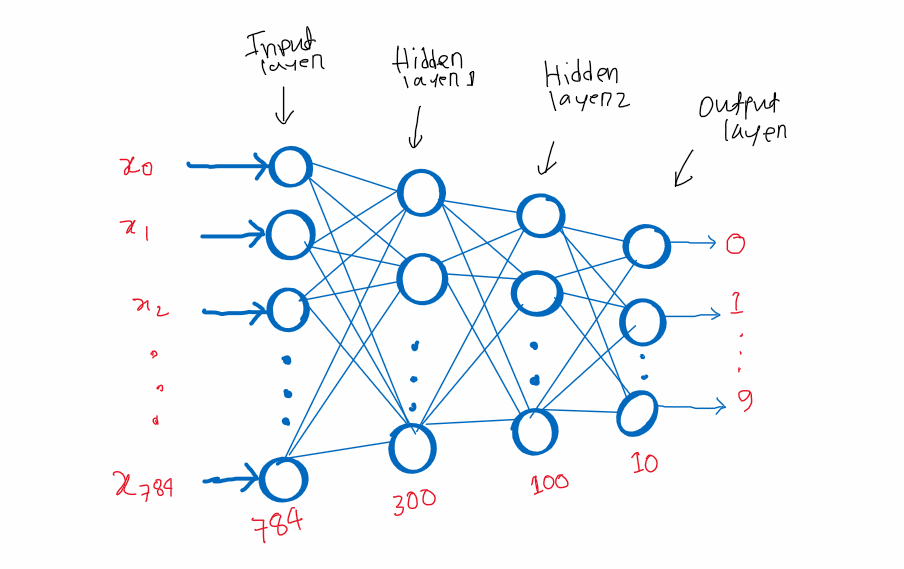

---

### <font color = 'blue'> Neural Network Model Creation

In [36]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28, 28], name = 'input_layer'),
    tf.keras.layers.Dense(300, activation = 'relu', name = 'hidden_layer1'),
    tf.keras.layers.Dense(100, activation = 'relu', name = 'hidden_layer2'),
    tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')
]

model_clf = tf.keras.models.Sequential(LAYERS)

---

In [37]:
model_clf.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               235500    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <font color = '#AA00FF'> Observation :
* Parameter in the layer is calculated as (present layer * next layer + present network neuron bais)

In [39]:
# parameters given to hidden layer 1 , hidden layer 2 and output layer
(784 * 300 + 300), (300 * 100 + 10), (100 * 10 + 10)

(235500, 30010, 1010)

In [41]:
# total number of parameters 
sum((235500, 30010, 1010))

266520

In [52]:
hidden_layer1 = model_clf.layers[1] 
print(hidden_layer1.name)
print('Total number of Weights given as input :',len(hidden_layer1.get_weights()[0]))
print('Total number of Bais given as input :',len(hidden_layer1.get_weights()[1]))

hidden_layer1
Total number of Weights given as input : 784
Total number of Bais given as input : 300


---

### <font color = 'blue'> Compiling Model

In [55]:
Loss_function = 'sparse_categorical_crossentropy'
# stocastic gradient descent
Optimizer = 'SGD'
Metrics = ['accuracy']

model_clf.compile(
    loss = Loss_function,
    optimizer = Optimizer,
    metrics = Metrics
)

---

### <font color = 'blue'> 1. Tensorboard Callback Functions
* Used to log events

In [68]:
# logging 
log_folder = 'logs'
%load_ext tensorboard

# remove previous log
# !rm -rf logs

# creating callbacks
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = log_folder, histogram_freq = 1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


---

### <font color = 'blue'> 2. Early Stopping Callback Function

In [69]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5)

---

### <font color = 'blue'> 3. Model Checkpoint Callback Function

In [70]:
ckpt_path = 'Model_ckpt.h5'
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only = True)

---

### <font color = 'blue'> Model Training

In [72]:
# within 1 epoch there will be multiple iteration 
Epochs = 10 
Validation_set = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs = Epochs, validation_data = Validation_set, batch_size = 32, callbacks = [tb_cb, early_stopping_cb, model_checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6075 - accuracy: 0.8430 - val_loss: 0.3116 - val_accuracy: 0.9128
Epoch 2/10
  42/1719 [..............................] - ETA: 6s - loss: 0.3203 - accuracy: 0.9115

C:\Users\darsh\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2896 - accuracy: 0.9172 - val_loss: 0.2427 - val_accuracy: 0.9332
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2361 - accuracy: 0.9324 - val_loss: 0.2009 - val_accuracy: 0.9432
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2017 - accuracy: 0.9425 - val_loss: 0.1774 - val_accuracy: 0.9506
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1764 - accuracy: 0.9493 - val_loss: 0.1578 - val_accuracy: 0.9562
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1570 - accuracy: 0.9552 - val_loss: 0.1460 - val_accuracy: 0.9600
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9597 - val_loss: 0.1355 - val_accuracy: 0.9636
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9636 - val_loss: 0.1238 - val_accuracy: 0.9650
Epo

In [79]:
%tensorboard --logdir={log_folder}

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

---

In [101]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.098309,0.972055,0.105620,0.9704
1,0.090795,0.974473,0.101971,0.9702
2,0.084077,0.976655,0.100942,0.9708
3,0.078191,0.978218,0.094150,0.9718
4,0.072858,0.979564,0.090351,0.9736
5,0.068243,0.981291,0.087387,0.9750
6,0.063582,0.983218,0.085169,0.9752
7,0.059802,0.984345,0.083274,0.9762
8,0.055805,0.985236,0.081942,0.9768
9,0.052272,0.986255,0.077444,0.9786


<AxesSubplot:>

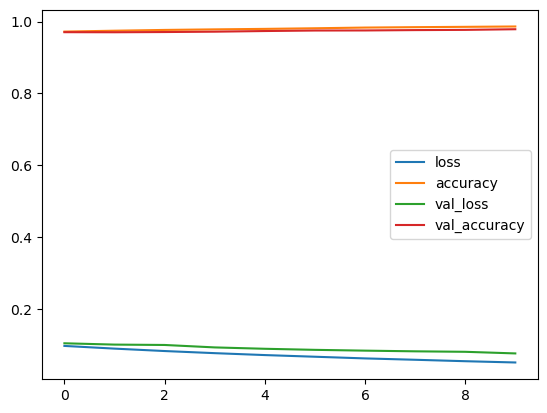

In [100]:
pd.DataFrame(history.history).plot()

---

### <font color = 'blue'> Loading Model

In [81]:
ckpt_model = tf.keras.models.load_model(ckpt_path)

history = ckpt_model.fit(x_train, y_train, epochs = 10, validation_data = Validation_set, batch_size = 32, callbacks = [tb_cb, early_stopping_cb, model_checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0983 - accuracy: 0.9721 - val_loss: 0.1056 - val_accuracy: 0.9704
Epoch 2/10
  34/1719 [..............................] - ETA: 8s - loss: 0.0698 - accuracy: 0.9807

C:\Users\darsh\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 8s 5ms/step - loss: 0.0908 - accuracy: 0.9745 - val_loss: 0.1020 - val_accuracy: 0.9702
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0841 - accuracy: 0.9767 - val_loss: 0.1009 - val_accuracy: 0.9708
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0782 - accuracy: 0.9782 - val_loss: 0.0941 - val_accuracy: 0.9718
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9796 - val_loss: 0.0904 - val_accuracy: 0.9736
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0682 - accuracy: 0.9813 - val_loss: 0.0874 - val_accuracy: 0.9750
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0636 - accuracy: 0.9832 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 8/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.0833 - val_accuracy: 0.9762
Epo

---

### <font color = 'blue'> Prediction

In [98]:
y_prob = model_clf.predict(x_test)

313/313 [==============================] - 1s 2ms/step


---